<a href="https://colab.research.google.com/github/poornima109s/Image-recognition/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation and Setup

---



In [80]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [81]:
!pip install face_recognition

In [82]:
cd"/content/gdrive/My Drive/Face_recognition"

/content/gdrive/My Drive/Face_recognition


In [83]:
!pwd

/content/gdrive/My Drive/Face_recognition


Initailization

---



HOG Features

---



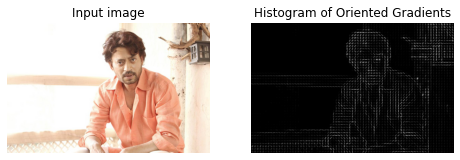

In [84]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure
import cv2

#Read image from disk modify
image=cv2.imread('irfan.jpg')
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#
#

#fd is the feature-descriptor(used to represent the image)
fd, hog_image=hog(image, orientations=8,pixels_per_cell=(16,16),
                  cells_per_block=(1,1),visualize=True,multichannel=True)

#plot input the hog image
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(8,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title("Input image")

#Rescale histogram for better display
hog_image_rescaled=exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title("Histogram of Oriented Gradients")
plt.show()

In [85]:
len(fd)

28800

In [86]:
image.shape

(768, 1200, 3)

Face Detection

---



In [88]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2 #OpenCV
%matplotlib inline

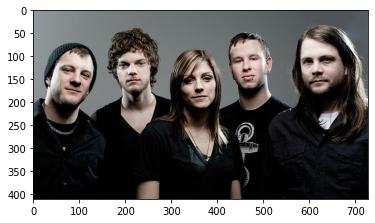

In [91]:
#load the jpg file into numpy array
#
image = cv2.imread("multi.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [92]:
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("found {} face(s) in input image. " .format(number_of_faces))

found 5 face(s) in input image. 


A face is located at pixel location Top: 428, Left: 88, Bottom: 502, Right: 163
A face is located at pixel location Top: 573, Left: 86, Bottom: 663, Right: 176
A face is located at pixel location Top: 315, Left: 126, Bottom: 404, Right: 216
A face is located at pixel location Top: 46, Left: 106, Bottom: 135, Right: 196
A face is located at pixel location Top: 179, Left: 96, Bottom: 254, Right: 171


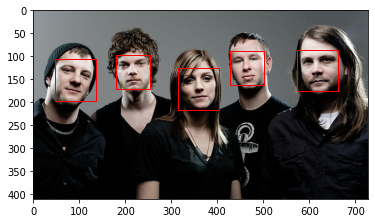

In [93]:
#get axis handle
plt.imshow(image)
ax = plt.gca()

#repeat for all faces founded
for face_location in face_locations:
  #print the location of each faces in this image, each face is a list of co-ordinates in(top, right, bottom, left) order
  top , right, bottom, left = face_location
  x,y,w,h= left, top, right, bottom
  print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x,y,w,h))

  # lets draw a box around the face
  rect= Rectangle((x,y), w-x, h-y, fill=False, color='red')
  ax.add_patch(rect)

#show output image
plt.show()

Face Recognition

---



In [94]:
import face_recognition

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [96]:
# load the known image(create a database)
# face demo
image = cv2.imread('akshay.jpg')
akshay= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#
image = cv2.imread('shraddha.jpg')
shraddha= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [97]:
#Get the face encoding of each person, this can fail if no one found in the photo
#Create database of all known faces encoding
akshay_encoding=face_recognition.face_encodings(akshay)[0]
shraddha_encoding=face_recognition.face_encodings(shraddha)[0]

known_face_encodings=[
        akshay_encoding,
        shraddha_encoding,
]

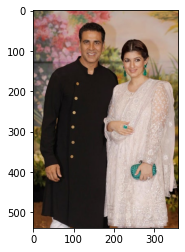

In [102]:
#load the image we want to check
image= cv2.imread("unknown1.jpg")
unknown_image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

# Get face encoding for any people in the picture
unknown_face_encodings= face_recognition.face_encodings(unknown_image)

In [103]:
from scipy.spatial import distance

# there might be more then one person ib the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:
  results=[]

  for known_face_encoding in known_face_encodings:
    d= distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)
  threshold=0.6
  results=np.array(results) <= threshold
  #print(results)
  name= 'unknown'

  if results[0]:
    name="Akshay kumar's image"
  elif results[1]:
    name="Shraddha kapoor's image"

  print(f"Found {name} in the photo!")

Found Akshay kumar's image in the photo!
Found unknown in the photo!
